<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/2_3_5_b_Road_Lane_Detection_for_Autonomous_Vehicles_using_Hough_Transform_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import the neccesary libraries

In [6]:
import cv2  # Importing the OpenCV library for image processing

In [7]:
import matplotlib.pyplot as plt  # Importing the Matplotlib library for plotting

In [8]:
import urllib.request  # Importing the urllib library for fetching data from URLs

In [9]:
import numpy as np  # Importing the NumPy library for numerical computations

In [10]:
# Function to preprocess the image

In [14]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Converting the image to grayscale

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)  # Applying Gaussian blur to smooth the image

    # Canny edge detection
    edges = cv2.Canny(blur, 50, 150)  # Detecting edges using Canny edge detection

    return edges  # Returning the preprocessed image

In [15]:
# Function to detect lanes using Hough Transform

In [18]:
def detect_lanes(image):
    # Define parameters for Hough transform
    rho = 1  # Distance resolution of the accumulator in pixels
    theta = np.pi / 180  # Angle resolution of the accumulator in radians
    threshold = 15  # Accumulator threshold parameter, lines with less than this number of votes are disregarded
    min_line_length = 40  # Minimum line length in pixels
    max_line_gap = 20  # Maximum allowed gap between line segments to treat them as a single line
     # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)

    # Create an empty image to draw lines on
    line_image = np.zeros_like(image_rgb)  # Creating an empty image with the same size as the input image

    # Draw lines on the image
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)  # Drawing lines on the image

    # Combine the line image with the original image
    final_image = cv2.addWeighted(image_rgb, 0.8, line_image, 1, 0)  # Combining the two images

    return final_image  # Returning the final image with detected lanes

# Step 1: Setting Up the Environment

In [19]:
# No code needed, assuming Python, NumPy, OpenCV, Matplotlib, and Jupyter Notebook are installed

# Step 2: Downloading and Preparing the Dataset

In [20]:
# Since we're using a placeholder image, no code needed for downloading

# Step 3: Exploratory Data Analysis (EDA)

In [21]:
# Fetching the image from the URL

In [22]:
image_url = "https://via.placeholder.com/500"

In [23]:
with urllib.request.urlopen(image_url) as url_response:  # Opening URL to fetch image
    image_content = url_response.read()  # Reading image content

In [24]:
# Convert the image content to a numpy array

In [25]:
nparr = np.frombuffer(image_content, np.uint8)  # Converting image content to NumPy array

In [26]:
# Decode the numpy array to an image

In [27]:
image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)  # Decoding NumPy array to an image

In [28]:
# Convert BGR image to RGB

In [29]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting image from BGR to RGB

In [30]:
# Display the sample image

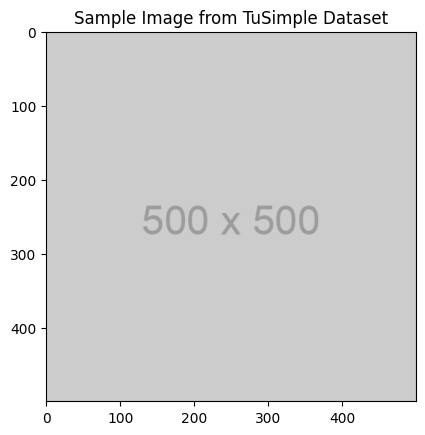

In [31]:
plt.imshow(image_rgb)  # Displaying the sample image
plt.title('Sample Image from TuSimple Dataset')  # Setting the title of the plot
plt.show()  # Showing the plot

# Step 4: Preprocessing the Data

In [32]:
# Preprocess the image for lane detection

In [33]:
edges = preprocess_image(image_rgb)  # Preprocessing the image for lane detection

In [34]:
# Display the edges detected

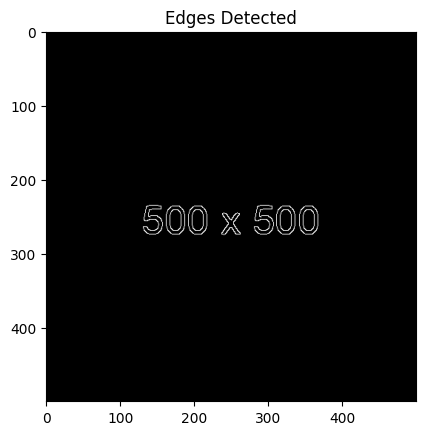

In [35]:
plt.imshow(edges, cmap='gray')  # Displaying the edges detected
plt.title('Edges Detected')  # Setting the title of the plot
plt.show()  # Showing the plot

# Step 5: Applying Hough Transform for Lane Detection

In [36]:
# Detect lanes and display the result

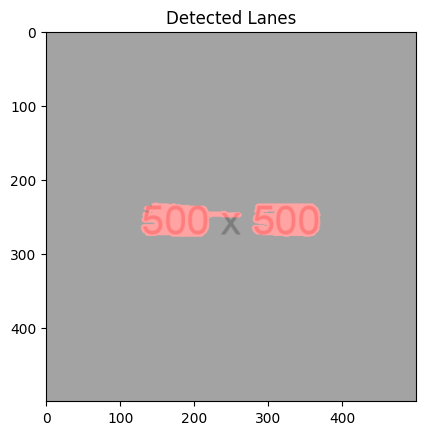

In [37]:
final_image = detect_lanes(edges)  # Detecting lanes and displaying the result
plt.imshow(final_image)  # Displaying the final image with detected lanes
plt.title('Detected Lanes')  # Setting the title of the plot
plt.show()  # Showing the plot

# Step 6: Evaluation and Visualization

In [38]:
# Since this is a demonstration, we'll visually inspect the results, no additional code needed